In [46]:
import math
import argparse

In [67]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--inputs", required=True, 
                help="[[cell_no, rain_int, rain_dur], [(lat, long), rain_int, rain_dur, hc]]")
ap.add_argument("-o", "--opt", required = True, help = "[MROPT, SOPT]")

args = vars(ap.parse_args())
input_weather =args["annotation"]
MROPT, SOPT =args["annotation"]
cell_loc = {127:(45.264827, -93.714984), 188 : (45.263060, -93.711164), 189: (45.264593, -93.713997) }

usage: ipykernel_launcher.py [-h] -i INPUTS -o OPT
ipykernel_launcher.py: error: the following arguments are required: -i/--inputs, -o/--opt


SystemExit: 2

In [63]:
def saturation_cal(cell_no, rain_int, rain_dur, hydrlic_conduc=None):
    if cell_no==188:
        saturation = 22.31+2.70*rain_int+3.31*rain_dur
    
    elif cell_no==189:
        saturation = 20.65+3.61*rain_int+3.15*rain_dur
    
    elif cell_no==127:
        saturation = 18.97+3.27*rain_int+2.71*rain_dur
    
    else:
        if isinstance(hydrlic_conduc, (int, float)): 
            saturation = 21.63+3.60*rain_int+2.83*rain_dur-0.34*hydrlic_conduc
        else:
            raise Exception("Provide correct hydraulic conductivity value")
            
    return saturation

In [40]:
a = -0.3123
b = 0.3
km = 6.8157
SOPT = 7
MROPT = 4

right_side= a+(b-a)/(1+math.exp(math.log(-b/a)+km*(saturation-SOPT)))
MR = math.log(right)*math.log(MROPT, 10)

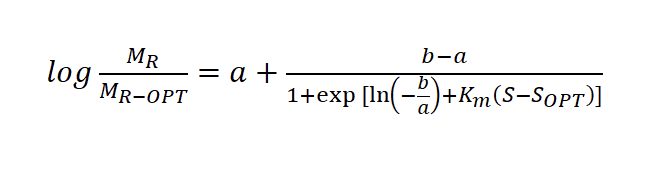

In [61]:
for inputs in input_weather:
    if isinstance(inputs[0], int):
        location = cell_loc[inputs[0]]
        
    if isinstance(inputs[0], tuple):
        location = inputs[0]
        hc = inputs[3]
        
    rain_int, rain_dur = inputs[1], inputs[2]

NameError: name 'input_weather' is not defined

tuple

False

56